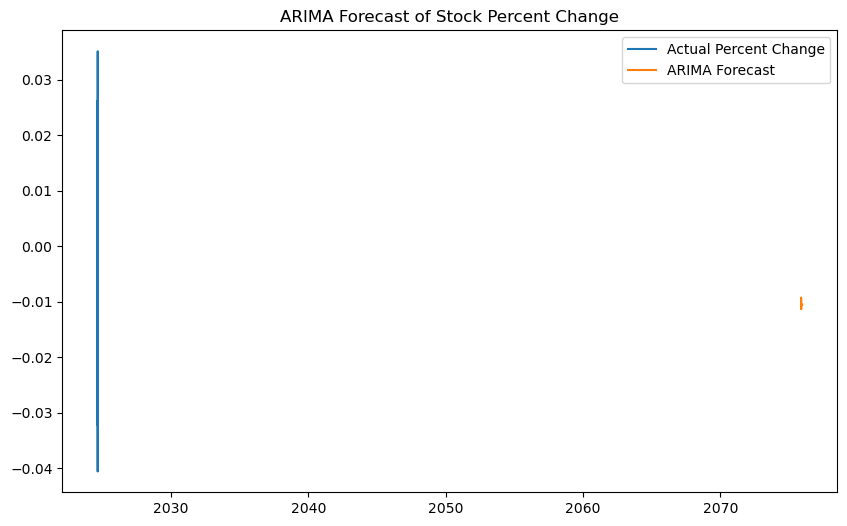

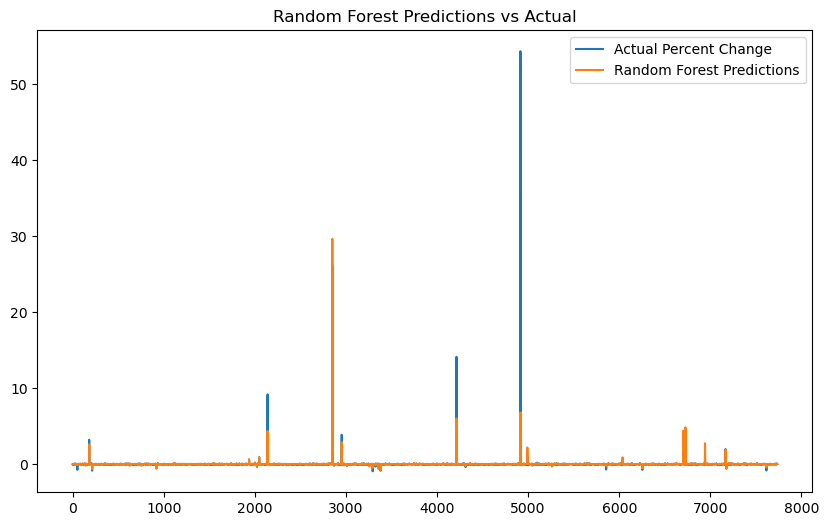

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/CSV/ALL_YEAR_DATA_REFACTORED_CHATGPT_SEP_4.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocess the data
# Assuming the 'Daily_Change_In_Price' is the target for forecasting
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Sort by date for time series
data = data.sort_values(by='Date')

# Set Date as index for time series models
data.set_index('Date', inplace=True)

# Step 2: Time Series Forecasting - ARIMA
# Use 'Daily_Change_In_Price' as the target variable
stock_percent_change = data['Daily_Change_In_Price'].dropna()

# Train ARIMA model
arima_model = ARIMA(stock_percent_change, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast the next 30 days
arima_forecast = arima_fit.forecast(steps=30)

# Step 4: Machine Learning Regression - Random Forest
# Define features and target
features = data.drop(columns=['Daily_Change_In_Price', 'Close', 'Adjusted Close', 'Volume', 'Dividend Amount', 'Split Coefficient'])
target = data['Daily_Change_In_Price'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
rf_predictions = rf_model.predict(X_test_scaled)

# Calculate error for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)

# Step 5: Plot Results

# ARIMA Forecast Plot
plt.figure(figsize=(10, 6))
plt.plot(stock_percent_change[-100:], label='Actual Percent Change')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast of Stock Percent Change')
plt.legend()
plt.show()

# Random Forest Predictions Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Percent Change')
plt.plot(rf_predictions, label='Random Forest Predictions')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

# Display model performances
performance_data = {
    'Model': ['ARIMA', 'Random Forest'],
    'Mean Squared Error': [arima_fit.mse, rf_mse]
}

performance_df = pd.DataFrame(performance_data)

# Display the performance DataFrame (assuming you use ace_tools for better visual output)
import ace_tools as tools
tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=performance_df)
